622_Apple

In [1]:
pip install hmmlearn scikit-learn numpy scipy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


         1    9651.21817316             +nan
         2   15684.94446076   +6033.72628760
         3   16113.66138561    +428.71692484
         4   16367.78550208    +254.12411647
         5   16638.51019985    +270.72469778
         6   16924.03179509    +285.52159524
         7   17364.72560501    +440.69380992
         8   17809.88407863    +445.15847362
         9   17996.00379476    +186.11971613
        10   18101.09086607    +105.08707131
        11   18172.83750725     +71.74664117
        12   18239.09815820     +66.26065096
        13   18305.73295976     +66.63480156
        14   18380.86169946     +75.12873970
        15   18456.11257114     +75.25087169
        16   18526.96371046     +70.85113931
        17   18581.01730781     +54.05359736
        18   18620.41209632     +39.39478850
        19   18652.67557177     +32.26347545
        20   18678.00633374     +25.33076197
        21   18706.88574124     +28.87940750
        22   18754.17343759     +47.28769635
        23

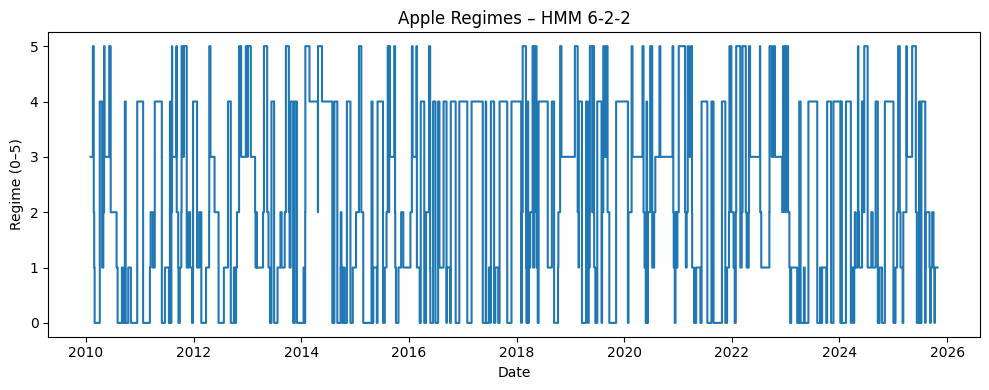

Transition Matrix (6×6):
[[0.901 0.044 0.011 0.    0.044 0.   ]
 [0.059 0.881 0.049 0.    0.01  0.   ]
 [0.011 0.086 0.81  0.004 0.    0.089]
 [0.    0.    0.005 0.956 0.    0.038]
 [0.046 0.004 0.002 0.    0.947 0.   ]
 [0.    0.015 0.064 0.04  0.004 0.877]]
State 0: [[0.00071 0.19665]
 [0.00209 0.21992]]
State 1: [[0.00061 0.23701]
 [0.0012  0.25639]]
State 2: [[-0.00301  0.32596]
 [ 0.00069  0.2893 ]]
State 3: [[ 5.3000e-04  7.4410e-01]
 [-1.0700e-03  4.4489e-01]]
State 4: [[0.0017  0.17329]
 [0.00075 0.14066]]
State 5: [[0.00225 0.31725]
 [0.00162 0.34026]]


In [3]:
#Import the necessary libraries
import pandas as pd
import numpy as np
from hmmlearn.hmm import GMMHMM
import matplotlib.pyplot as plt
import numpy as np

#Load data
apple = pd.read_csv(r'E:\3.IS403\Đồ án\Dataset final\Apple_clean.csv')
apple.columns = [c.strip().replace(' ', '_') for c in apple.columns]

apple['Date'] = pd.to_datetime(apple['Date'], errors='coerce')
apple = apple.dropna(subset=['Date'])
apple = apple.sort_values('Date')

close_col = 'Close' if 'Close' in apple.columns else apple.select_dtypes(float).columns[0]
apple['LogReturn'] = np.log(apple[close_col]).diff()
apple['Volatility'] = apple['LogReturn'].rolling(20).std() * np.sqrt(252)
apple = apple.dropna(subset=['LogReturn','Volatility']).reset_index(drop=True)

X = apple[['LogReturn','Volatility']].values
lengths = [len(X)]

# Khởi tạo mô hình HMM 6:2:2
model = GMMHMM(
    n_components=6,    
    n_mix=2,        
    covariance_type='diag',
    n_iter=200, tol=1e-3,
    random_state=42, verbose=True
)

# Huấn luyện
model.fit(X, lengths)

# Dự đoán chuỗi trạng thái ẩn
apple['Regime'] = model.predict(X)
plt.figure(figsize=(10,4))
plt.plot(apple['Date'], apple['Regime'], drawstyle='steps-post')
plt.title('Apple Regimes – HMM 6-2-2')
plt.xlabel('Date'); plt.ylabel('Regime (0–5)')
plt.tight_layout(); plt.show()
print("Transition Matrix (6×6):")
print(np.round(model.transmat_, 3))
for s in range(model.n_components):
    means = [model.means_[s][m] for m in range(model.n_mix)]
    print(f"State {s}: {np.round(means, 5)}")
apple.to_csv('apple_hmm622_regimes.csv', index=False)